<a href="https://colab.research.google.com/github/hygo2025/CDD/blob/main/lista_01/lista_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lista 1: Um pouco mais sobre CDFs, BoxPlots, histogramas...

## Forma de entrega

Salve essa página (com código e respostas geradas) em ``.pdf`` e submeta o documento na atividade do AVA (apenas um integrante do grupo deve fazer a submissão).

## Grupos

* **Graduação:** grupo de até 3 pessoas
* **Pós-Graduação:** individual

## Integrantes do grupo

1. **Nome(s):**

2. **Matrícula(s):**

3. **E-mail(s) institucional(is):**

3. **Curso(s):**

4. **Link do seu Colab com suas soluções (para que o professor possa acessar e rodar o código):**

## Sobre a Avaliação

Todas questões têm o mesmo peso/valor.

## Questão 1

O objetivo desta questão é comparar as **Funções de Distribuição** (i.e., CDF) teórica e empírica de algumas distribuições contínuas bem conhecidas.

Lembre-se que nós conversamos um pouco sobre CDFs na Aula 3.

### Exemplo

Os ECDFs estão entre os gráficos mais importantes na análise estatística. Ao utilizar um gráfico de função de distribuição como essa, podemos ter uma análise estatística mais resumida a respeito de nossa variável numérica. Ela mostra todos os dados e dá uma imagem completa de como os dados são distribuídos.

É uma ferramenta poderosa para nos ajudar a pensar probabilisticamente. Claramente ela não anula a importância dos histogramas e nem dos swarmplots, porém ao iniciarmos nossa análise diretamente com ECDF, já temos um panorama empírico completo da variável.Vamos começar com um exemplo sobre a distribuição Uniforme contínua.

A biblioteca ``scipy`` possui funcionalidades para gerar números pseudo-aleatórios e para computar valores da CDF teórica da distribuição. Leia mais sobre em https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html.

A biblioteca ``statsmodels`` possui funcionalidades para computar a CDF empírica de um conjunto de observações.

In [74]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [75]:
def plot_uniform_cdf(loc, scale, n):
  # gera 'n' números de uma distribuição uniforme contínua no
  # intervalo [loc, loc + scale]
  r = uniform.rvs(loc = loc, scale = scale, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
  # [loc, loc + scale]
  plt.plot(cdf.x, uniform.cdf(cdf.x, loc = loc, scale = scale),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best')
  plt.xlabel(r'$x$')
  plt.ylabel(r'CDF')
  plt.gcf().set_size_inches(3.5, 3.5)

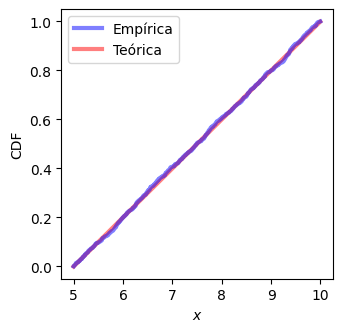

In [76]:
plot_uniform_cdf(5, 5, 1000)

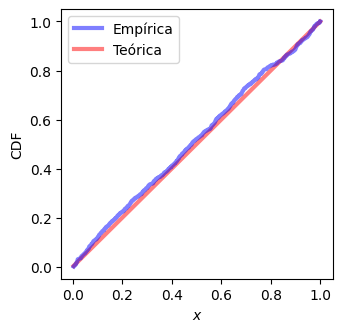

In [77]:
plot_uniform_cdf(0, 1, 1000)

### Parte (*a*)

Repita a análise acima para a distribuição normal. Lembre-se que a distribuição normal possui dois parâmetros: $\mu$ e $\sigma$.

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição normal.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição normal;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [78]:
from scipy.stats import norm

In [79]:
def plot_normal_cdf(mu, sigma, n):
    # gera 'n' números de uma distribuição uniforme contínua no
    r = norm.rvs(loc=mu, scale=sigma, size=n)

    # plota a CDF empírica dos números gerados
    cdf = ECDF(r)
    plt.plot(cdf.x, cdf.y, linewidth=3, alpha=0.5, color='blue', label='Empírica')

    # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
    plt.plot(cdf.x, norm.cdf(cdf.x, loc=mu, scale=sigma), alpha=0.5, color='red', linewidth=3, label='Teórica', zorder=0)

    # Ajustes de rótulos e tamanho da figura
    plt.legend(loc='best')
    plt.xlabel('$x$')
    plt.ylabel('$CDF$')
    plt.gcf().set_size_inches(5.5, 3.5)
    plt.show()

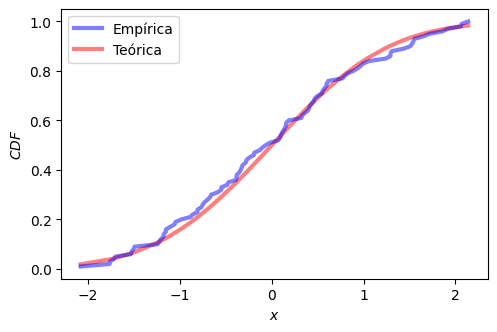

In [80]:
plot_normal_cdf(0, 1, 100)

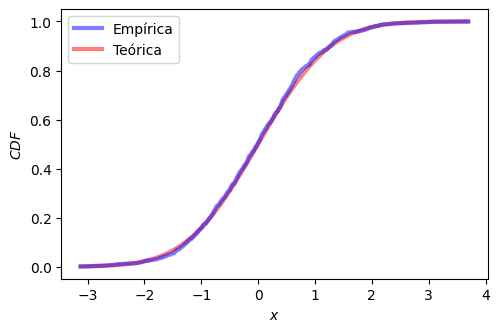

In [81]:
plot_normal_cdf(0, 1, 1000)

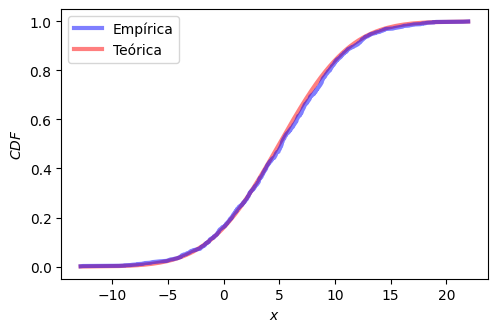

In [82]:
plot_normal_cdf(5, 5, 1000)

### Parte (*b*)

Repita a análise inicial para a distribuição exponencial. Lembre-se, dado um parâmetro $\lambda > 0$, a densidade da distribuição exponencial é:
$$f(x) = \lambda e^{-\lambda x}\text{, } x > 0.$$

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição exponencial.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição exponencial;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

**ATENÇÃO:** Leia com atenção a documentação da biblioteca mencionada para entender como o parâmetro $\lambda$ deve ser fornecido. O $\lambda$ da definição acima não é o mesmo que o `scale` da biblioteca.

In [83]:
from scipy.stats import expon

In [84]:
def plot_exponential_cdf(lambda_, n):
    scale=(1 /lambda_)
    # gera 'n' números de uma distribuição uniforme contínua no
    r = expon.rvs(scale=scale, size=n)

    # plota a CDF empírica dos números gerados
    cdf = ECDF(r)
    plt.plot(cdf.x, cdf.y, linewidth=3, alpha=0.5, color='blue', label='Empírica')

    # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
    plt.plot(cdf.x, expon.cdf(cdf.x, scale=scale), alpha=0.5, color='red', linewidth=3, label='Teórica', zorder=0)

    # Ajustes de rótulos e tamanho da figura
    plt.legend(loc='best')
    plt.xlabel('$x$')
    plt.ylabel('$CDF$')
    plt.gcf().set_size_inches(5.5, 3.5)
    plt.show()

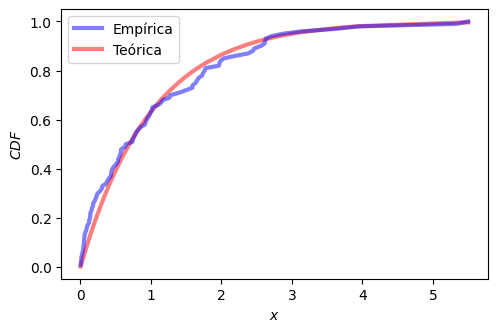

In [85]:
plot_exponential_cdf(1, 100)

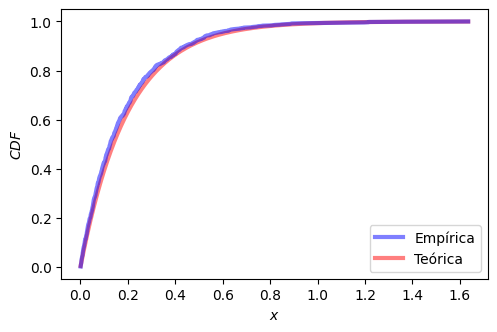

In [86]:
plot_exponential_cdf(5, 1000)


### Parte (*c*)

Agora as coisas ficam mais interessantes...

Repita a análise inicial para a distribuição de pareto. Lembre-se, dado um parâmetro $b > 0$, a densidade da distribuição de pareto é:
$$f(x) = \frac{b}{x^{b+1}}\text{, } x \ge 1.$$

Consulte https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_pareto.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição de pareto.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição de pareto;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [87]:
from scipy.stats import pareto

In [88]:
def plot_pareto_cdf(b, n):
    # gera 'n' números de uma distribuição uniforme contínua no
    r = pareto.rvs(b, size=n)
    cdf = ECDF(r)
    # plota a CDF empírica dos números gerados
    plt.plot(cdf.x, cdf.y, linewidth=3, alpha=0.5, color='blue', label='Empírica')

    # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
    plt.plot(cdf.x, pareto.cdf(cdf.x, b), alpha=0.5, color='red', linewidth=3, label='Teórica', zorder=0)

    # Ajustes de rótulos e tamanho da figura
    plt.legend(loc='best')
    plt.xlabel('$x$')
    plt.ylabel('$CDF$')
    plt.gcf().set_size_inches(5.5, 3.5)
    plt.show()

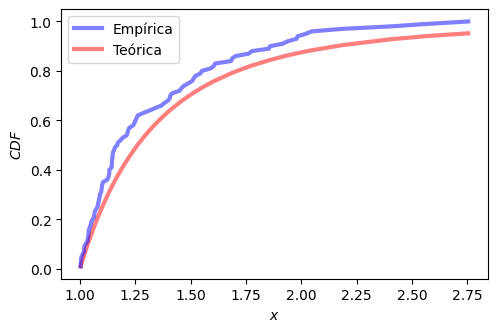

In [89]:
plot_pareto_cdf(3, 100)

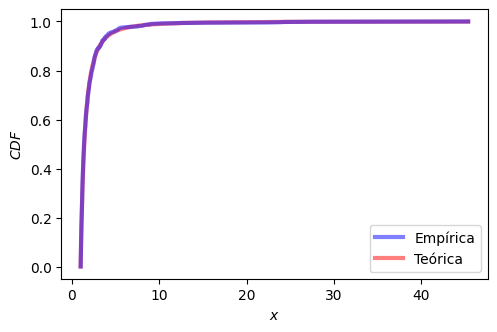

In [90]:
plot_pareto_cdf(2, 1000)

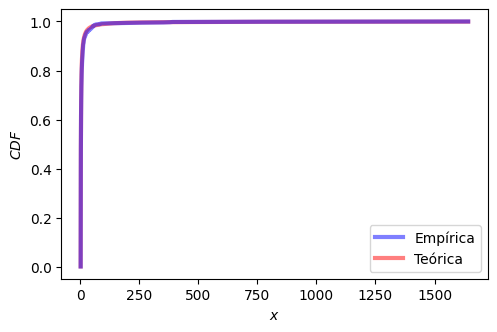

In [91]:
plot_pareto_cdf(1, 1000)

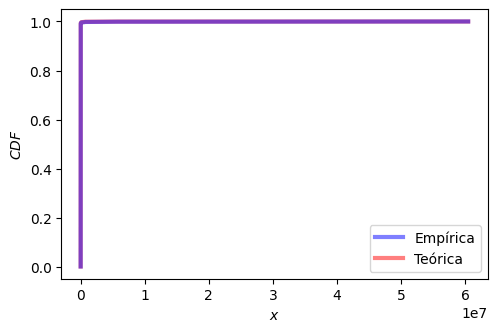

In [92]:
plot_pareto_cdf(0.5, 1000)

Após fazer as figuras, você provavelmente observou que para valores pequenos de $b$, a CDF da distribuição de pareto é bastante difícil de ler, uma vez que fica praticamente "colada" às retas $x = 0$ e $y = 1$.

Esse fenômeno ocorre porque, quando $b$ é pequeno, valores muito grandes (i.e., discrepantes ou *outliers*) têm uma probabilidade não negligível de ocorrerem.

Quando observamos o comportamento das figuras acima, devemos modificar a forma de visualizar a distribuição:
1. Devemos gerar uma figura para a CCDF (*Complementary Cumulative Distribution Function*). A CCDF de um valor $x$ é definida como 1 menos a CDF de $x$.
2. Devemos colocar os eixos $x$ e $y$ em escala logarítmica.

Complete a função abaixo para gerar a figura da forma descrita acima e gere os gráficos para os mesmos casos que testou anteriormente.

In [93]:
def plot_pareto_ccdf(b, n):
    # gera 'n' números de uma distribuição uniforme contínua no
    r = pareto.rvs(b, size=n)
    cdf = ECDF(r)

    ccdf_x = cdf.x
    ccdf_y = 1 - cdf.y

    # plota a CDF empírica dos números gerados
    plt.loglog(ccdf_x, ccdf_y, linewidth=3, alpha=0.5, color='blue', label='Empírica')

    # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
    plt.loglog(ccdf_x, 1 - pareto.cdf(ccdf_x, b), alpha=0.5, color='red', linewidth=3, label='Teórica', zorder=0)

    # Ajustes de rótulos e tamanho da figura
    plt.legend(loc='best')
    plt.xlabel('$x$')
    plt.ylabel('$CDF$')
    plt.gcf().set_size_inches(5.5, 3.5)
    plt.show()


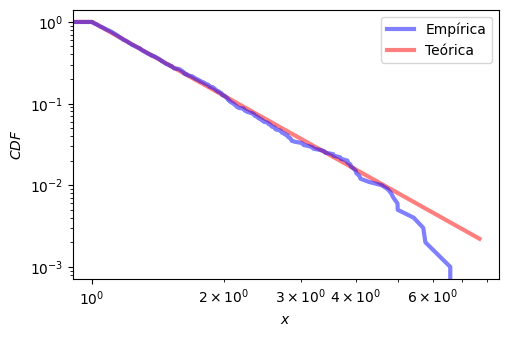

In [94]:
plot_pareto_ccdf(3, 1000)

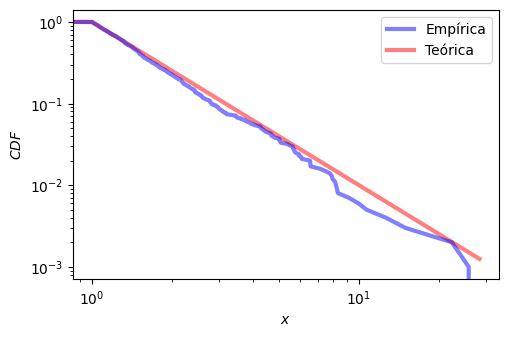

In [95]:
plot_pareto_ccdf(2, 1000)

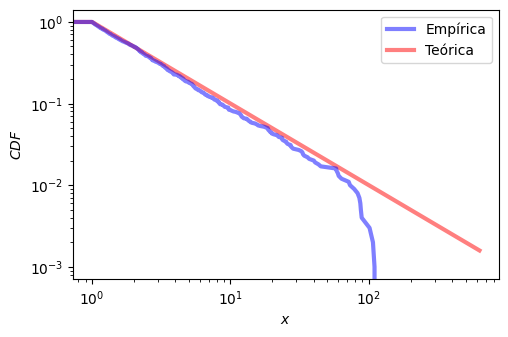

In [96]:
plot_pareto_ccdf(1, 1000)

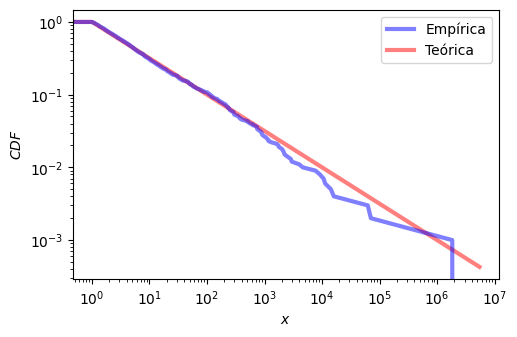

In [97]:
plot_pareto_ccdf(0.5, 1000)

## Questão 2

Esta questão é **obrigatória** apenas para alunos da **pós-graduação**.

O objetivo desta questão é entender o comportamento da **parte (*c*)** da questão anterior.

Você deve ler as duas primeiras seções do artigo https://arxiv.org/pdf/cond-mat/0412004.pdf e fazer um resumo (de no máximo uma página). Certifique-se de incluir no seu resumo, entre outras informações que achar relevantes, o motivo de a CCDF da distribuição de pareto ter a forma que tem quando ambos os eixos estão em escala logarítmica.

## Questão 3

Primeiro, você deve ler os artigos abaixo.
1. [Common pitfalls in statistical analysis: The use of correlation techniques](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/)
2. [Chocolate Consumption, Cognitive Function,
and Nobel Laureates](https://www.biostat.jhsph.edu/courses/bio621/misc/Chocolate%20consumption%20cognitive%20function%20and%20nobel%20laurates%20(NEJM).pdf)

Resumindo o que foi lido nos artigos, responda as seguintes questões:

1. O que é o coeficiente de correlação?
2. Quando o coeficiente de correlação é útil e quando ele pode ser a ferramenta errada para analisar a relação entre duas variáveis?
3. Qual a diferença entre causalidade e correlação?

**Observação 1:** é esperado que a resposta das três perguntas utilize aproximadamente duas páginas A4.

**Observação 2:** você pode consultar outras fontes para responder as questões acima. No entanto, é esperado que as respostas sejam no contexto do conteúdo dos artigos.

In [98]:
from IPython.display import Image, display

# get the image
display(Image(url="https://github.com/hygo2025/CDD/blob/main/lista_01/q3_pt1.jpg?raw=true", width=800, height=600))
print()
display(Image(url="https://github.com/hygo2025/CDD/blob/main/lista_01/q3_pt2.jpg?raw=true", width=800, height=600))

## Questão 4

Obtenha o conjunto de dados disponível no AVA da disciplina para essa questão. O conjunto de dados possui duas colunas: `type` e `score`. Você pode pensar nesses dados como sendo o resultados de medições (`score`) realizadas em um conjunto de objetos que pode ser de três tipos diferentes (`type`).

### Parte (a)

Leia o conjunto de dados e armazene-o em um `DataFrame` do `Pandas`.

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df1 = pd.read_csv('https://raw.githubusercontent.com/hygo2025/CDD/refs/heads/main/lista_01/dados_questao_4.csv')

### Parte (b)

Usando a biblioteca `seaborn`, Faça o *BoxPlot* da variável `score` para todos os objetos, independentemente do tipo.

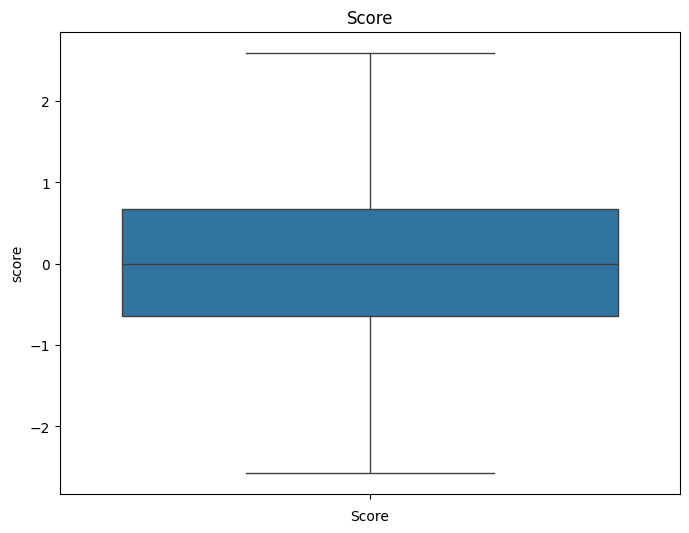

In [100]:
plt.figure(figsize = (8,6))
sns.boxplot(y=df1['score'])
plt.title('Score')
plt.xlabel('Score')
plt.show()


Agora, faça, em uma mesma figura, os *BoxPlots* para a variável `score` de acordo com a variável `type`. Isto é, um *BoxPlot* da variável `score` para cada valor de `type`. Novamente, use a biblioteca `seaborn`.

<Figure size 800x600 with 0 Axes>

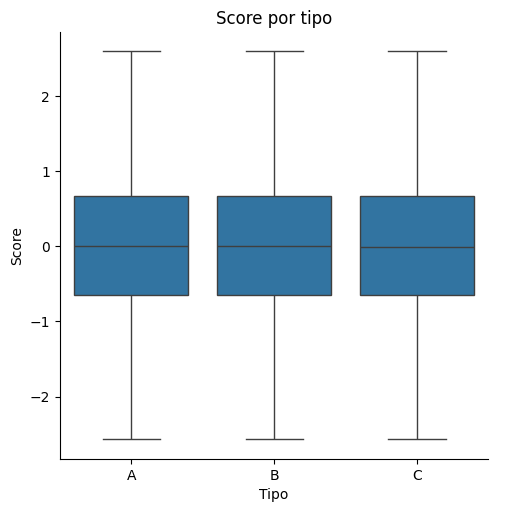

In [101]:
plt.figure(figsize = (8,6))
sns.catplot(x="type", y="score", kind="box", data=df1)
plt.title('Score por tipo')
plt.xlabel('Tipo')
plt.ylabel('Score')
plt.show()


Com base **apenas** nos *BoxPlots*, o que é possível afirmar sobre a dispersão/distribuição dos dados das três variáveis? Você diria que as três distribuições são similares?


### Parte (c)

Agora:

1. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os histogramas.

2. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça as CDFs empíricas (vide Questão 1).

3. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os gráficos de Violino.



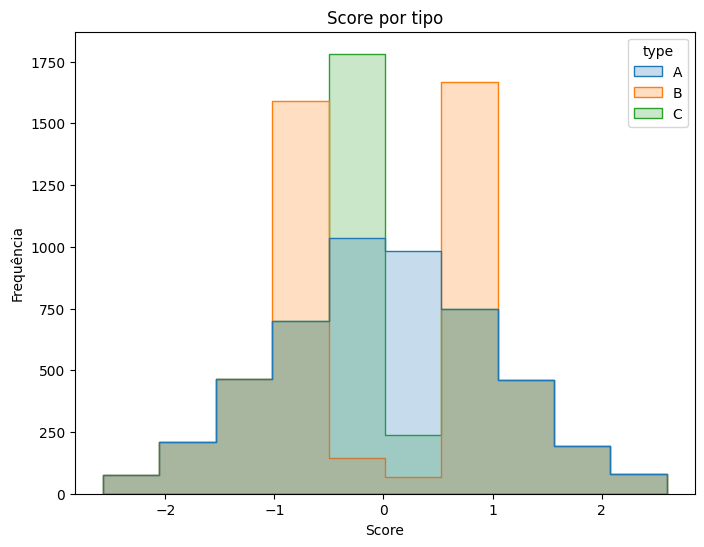

In [102]:
plt.figure(figsize = (8,6))
sns.histplot(data=df1, x='score', hue='type', kde=False, bins=10, element='step')
plt.title('Score por tipo')
plt.xlabel('Score')
plt.ylabel('Frequência')
plt.show()

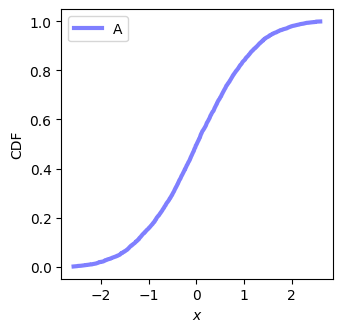

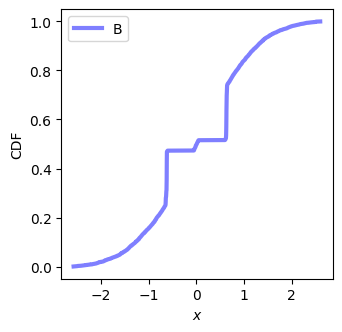

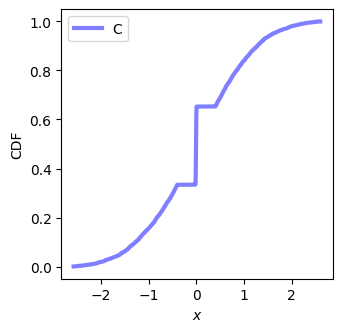

In [103]:
from typing import List


def plot_cdf(df: pd.DataFrame, labels: List[str]) -> None:
    plt.figure(figsize = (8,6))
    for label in labels:
        data = df[df['type'] == label]
        cdf = ECDF(data.score)
        plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
            label = label)
        plt.legend(loc = 'best')
        plt.xlabel(r'$x$')
        plt.ylabel(r'CDF')
        plt.gcf().set_size_inches(3.5, 3.5)
        plt.show()


plot_cdf(df1, df1['type'].unique())


<Figure size 800x600 with 0 Axes>

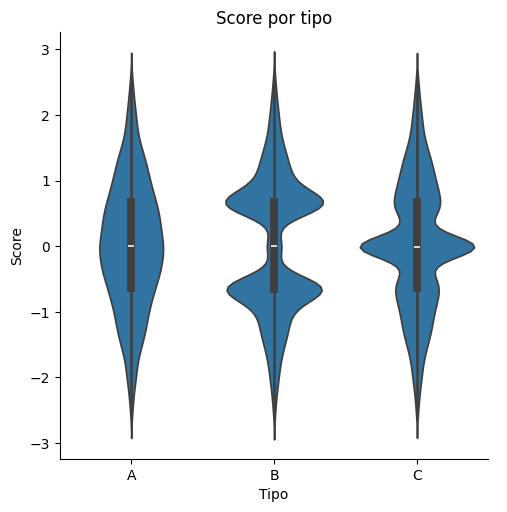

In [104]:
plt.figure(figsize=(8, 6))
sns.catplot(x="type", y="score", kind="violin", data=df1)
plt.title('Score por tipo')
plt.xlabel('Tipo')
plt.ylabel('Score')
plt.show()

Revisitando a conclusão da Parte (b)...

Com base nessas novas figuras, o que é possível dizer sobre a dispersão/distribuição das três variáveis? Você diria que as três distribuições são similares?

## Questão 5

Ainda no espírito das duas questões anteriores.

Leia o conjunto de dados, disponível no AVA, para a Questão 5 e carregue os dados em um `DataFrame` do `Pandas`. O arquivo contém um conjunto de pontos no plano, ou seja, uma coleção de pares ($x$, $y$).

Na verdade, o arquivo é uma coleção de vários conjuntos de dados. O arquivo possui três colunas:
- `dataset` indica a qual conjunto de dados um ponto pertence
- `x` indica a coordenada $x$ de cada ponto do conjunto
- `y` indica a coordenada $y$ de cada ponto do conjunto



In [105]:
df2 = pd.read_csv('https://raw.githubusercontent.com/hygo2025/CDD/refs/heads/main/lista_01/dados_questao_5.csv')

### Parte (a)

Para cada um dos 13 conjuntos de dados disponível no arquivo, calule e imprima:
1. A média dos valores das colunas `x` e `y`
2. O desvio padrão dos valores das colunas `x` e `y`
3. A correlação linear entre as colunas `x` e `y`

Com base nos valores observados, formule uma hipótese sobre o grau de similaridade entre os diversos conjuntos de dados. Em outras palavras, vocês diriam que eles são similares ou diferentes?

**Observação:** tente modularizar seu código e utilizar os recursos do `Pandas`, por exemplo, `groupby`.

In [106]:
df2.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [107]:
def calc_data_statistics(df: pd.DataFrame) -> pd.DataFrame:
    return df.groupby('dataset').agg(
        x_mean=('x', 'mean'),
        y_mean=('y', 'mean'),
        x_std=('x', 'std'),
        y_std=('y', 'std'),
        correlation=('x', lambda x: x.corr(df.loc[x.index, 'y']))
    )

calc_data_statistics(df2)


,x_mean,y_mean,x_std,y_std,correlation
dataset,,,,,
away,54.266100,47.834721,16.769825,26.939743,-0.064128
bullseye,54.268730,47.830823,16.769239,26.935727,-0.068586
circle,54.267320,47.837717,16.760013,26.930036,-0.068343
dino,54.263273,47.832253,16.765142,26.935403,-0.064472
dots,54.260303,47.839829,16.767735,26.930192,-0.060341
h_lines,54.261442,47.830252,16.765898,26.939876,-0.061715
high_lines,54.268805,47.835450,16.766704,26.939998,-0.068504
slant_down,54.267849,47.835896,16.766759,26.936105,-0.068980
slant_up,54.265882,47.831496,16.768853,26.938608,-0.068609


### Parte (b)

Agora, vamos testar a hipótese estabelecida no item anterior. Faça um gráfico, para cada um dos 13 conjuntos de dados, marcando os pontos de cada conjunto no plano.

Com base nos gráficos, o que pode ser dito sobre o grau de similaridade entre os diversos conjuntos de dados? Em outras palavras, vocês diriam que eles são similares ou diferentes?


### Resposta:
Somente olhando os gráficos produzidos abaixo, diria que são bem diferentes, talvez os mais parecidos sejam o `eye`e o `bulseye`

O `away` e o `wide lines` dependendo da métrica que formos usar podemos considerar mais próximos também.

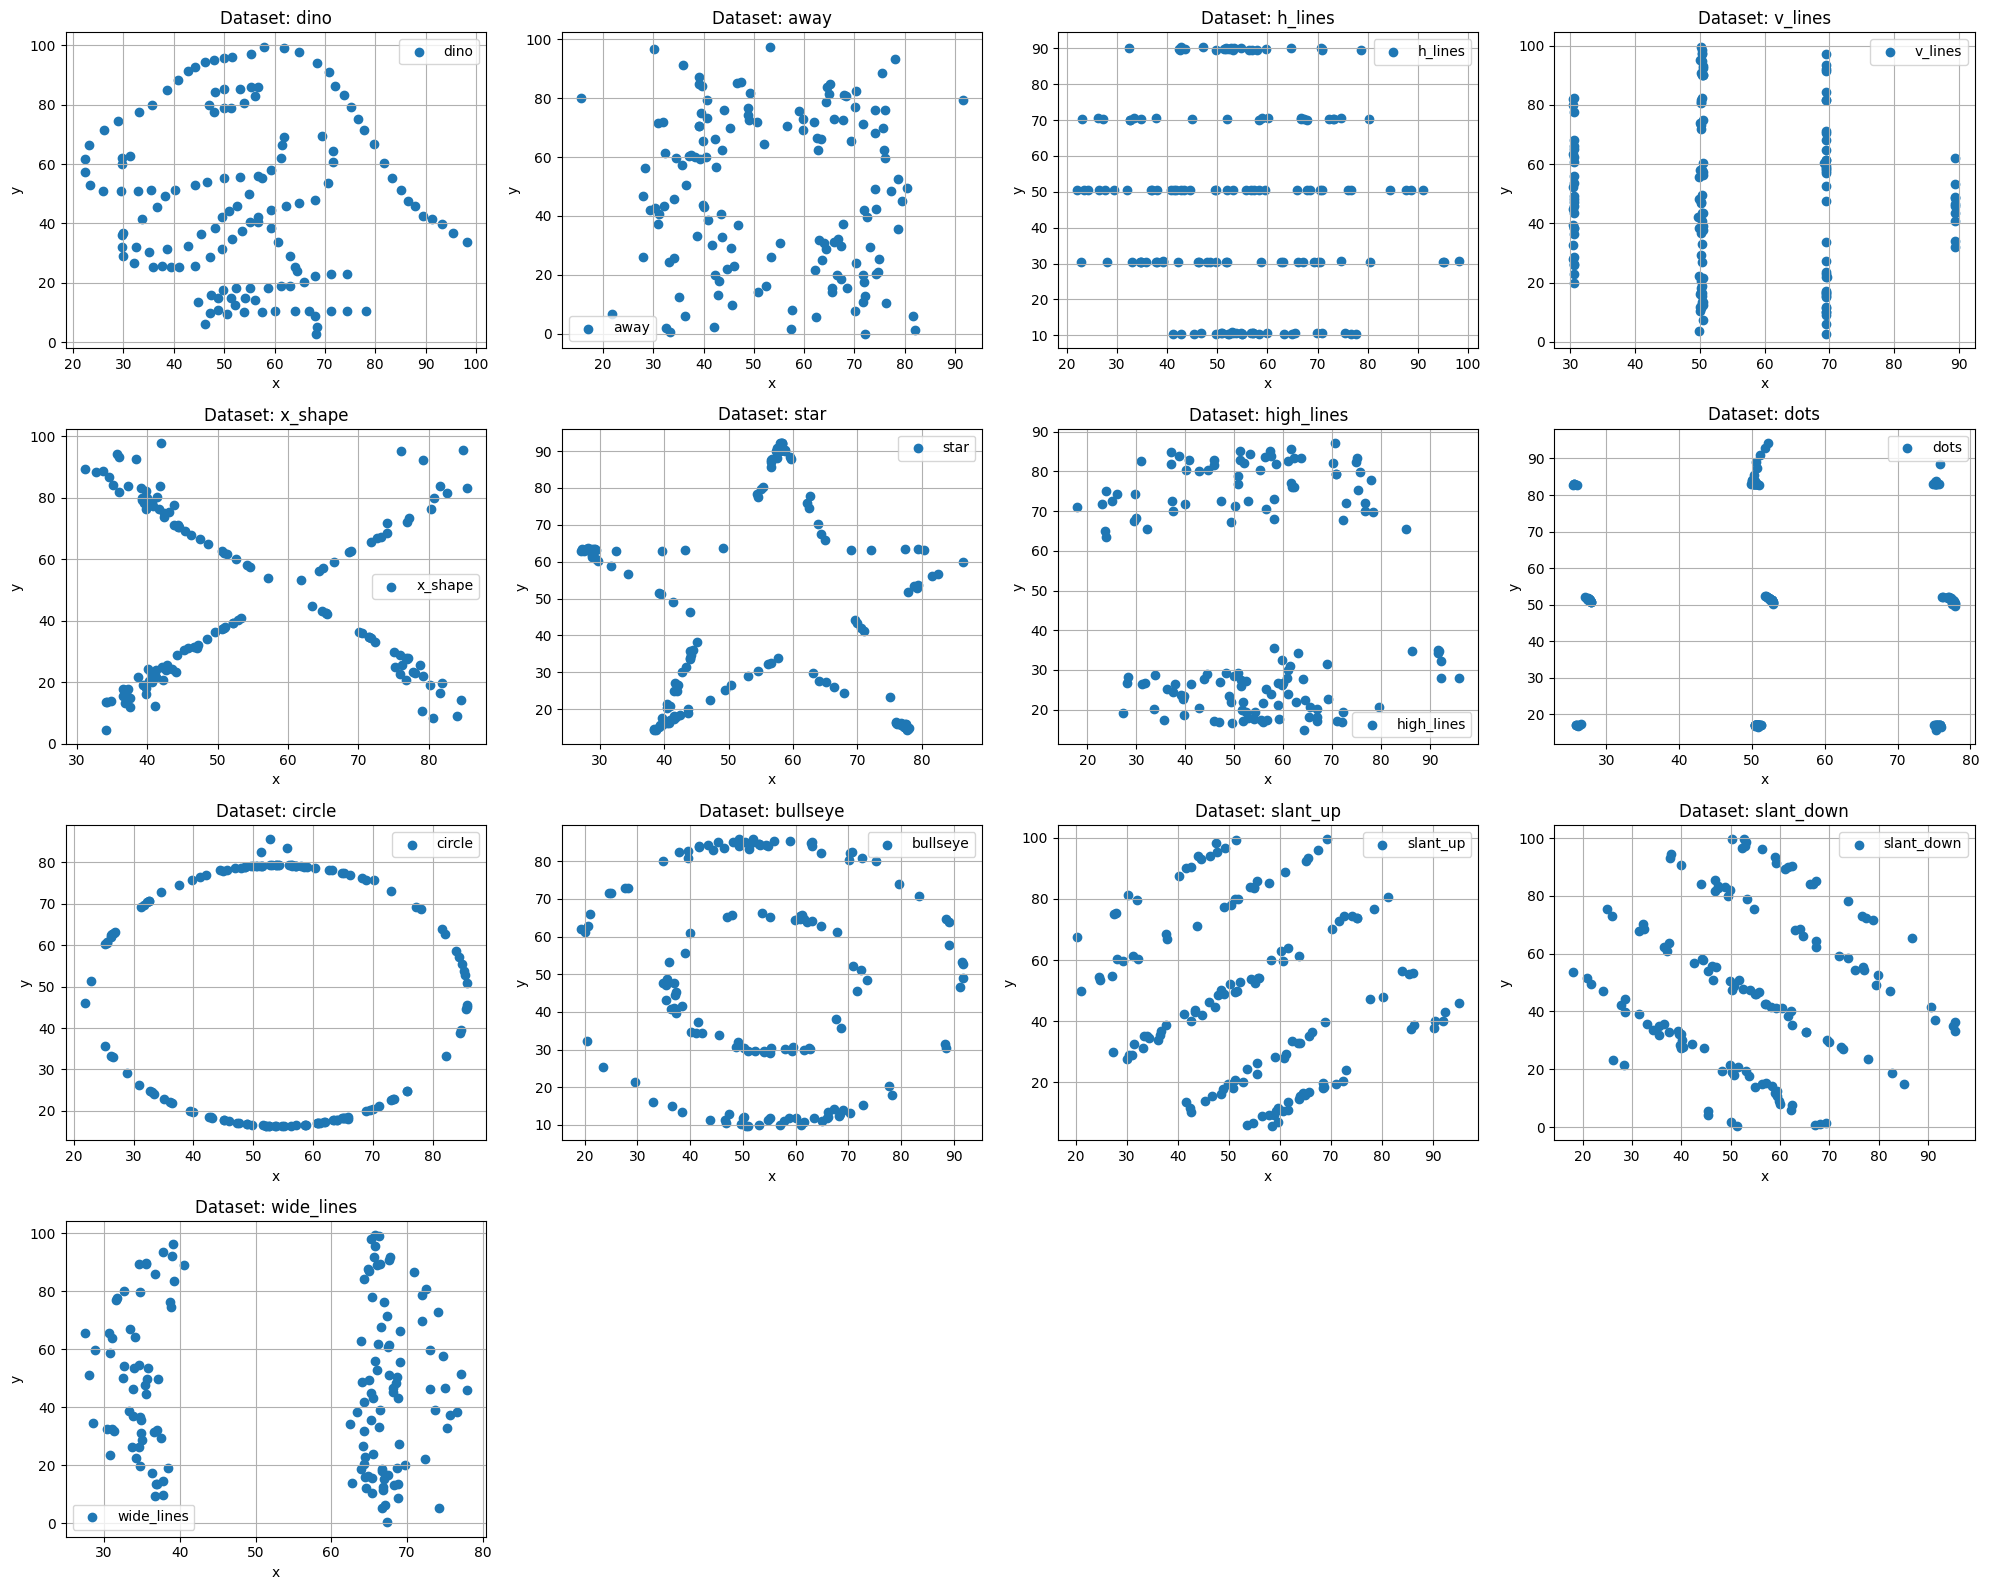

In [108]:
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.flatten()

for i, dataset in enumerate(df2['dataset'].unique()):
    dataset_line = df2[df2['dataset'] == dataset]
    ax = axes[i]
    ax.scatter(dataset_line['x'], dataset_line['y'], label=dataset)
    ax.set_title(f"Dataset: {dataset}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Referências (Spoiler Alert!)

Os dados de algumas questões foram obtidos em https://www.research.autodesk.com/publications/same-stats-different-graphs/. Para não estragar a surpresa, sugiro consultar essa referência apenas após tentar resolver as questões. De toda forma, as respostas das perguntas não estão contidas na página citada.